Train shape: (11274, 28)
Test shape: (2819, 28)


<ipython-input-5-5a280de3c111>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=feature_names[indices][:15], palette='viridis')


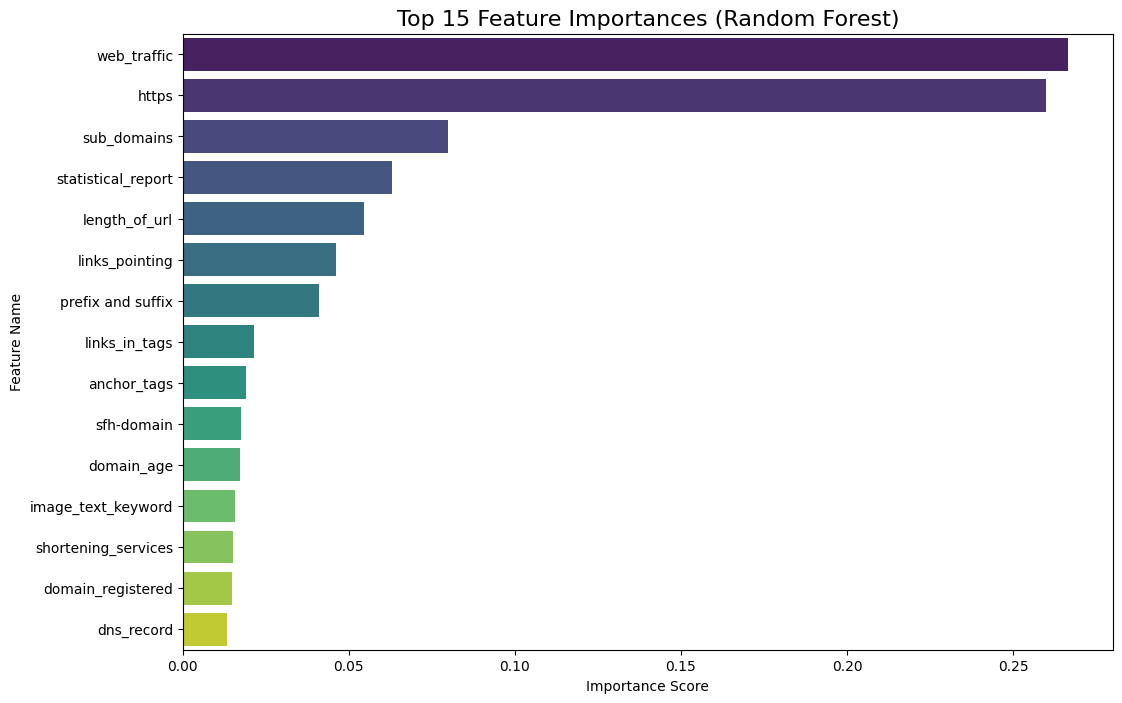

Original features: 28
Selected features: 7
Selected Features:
['length_of_url', 'prefix and suffix', 'sub_domains', 'https', 'web_traffic', 'links_pointing', 'statistical_report']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve # Import learning_curve here
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier,
    AdaBoostClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import itertools
import random
from sklearn.feature_selection import SelectFromModel


# Load Dataset
df = pd.read_csv('./dataset.csv')  # Make sure the CSV file is available in your path

# 1. Train/Test Split
X = df.drop('result', axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

# -----------------------------------------------------------

# 2. Feature Importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Plot Top 15 Important Features
plt.figure(figsize=(12,8))
sns.barplot(x=importances[indices][:15], y=feature_names[indices][:15], palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

# -----------------------------------------------------------

# 3. Feature Selection based on Importance
selector = SelectFromModel(rf_model, prefit=True, threshold='mean')

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

selected_feature_names = X_train.columns[selector.get_support()]
print("Selected Features:")
print(selected_feature_names.tolist())

# (Optional) Create DataFrames for better readability
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# -----------------------------------------------------------


<ipython-input-6-645f27280100>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


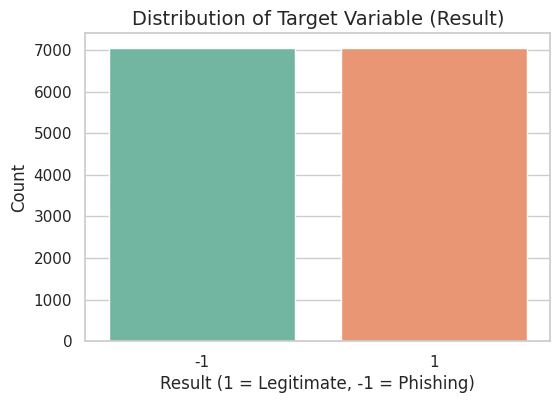

<ipython-input-6-645f27280100>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')
<ipython-input-6-645f27280100>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')
<ipython-input-6-645f27280100>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')
<ipython-input-6-645f27280100>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

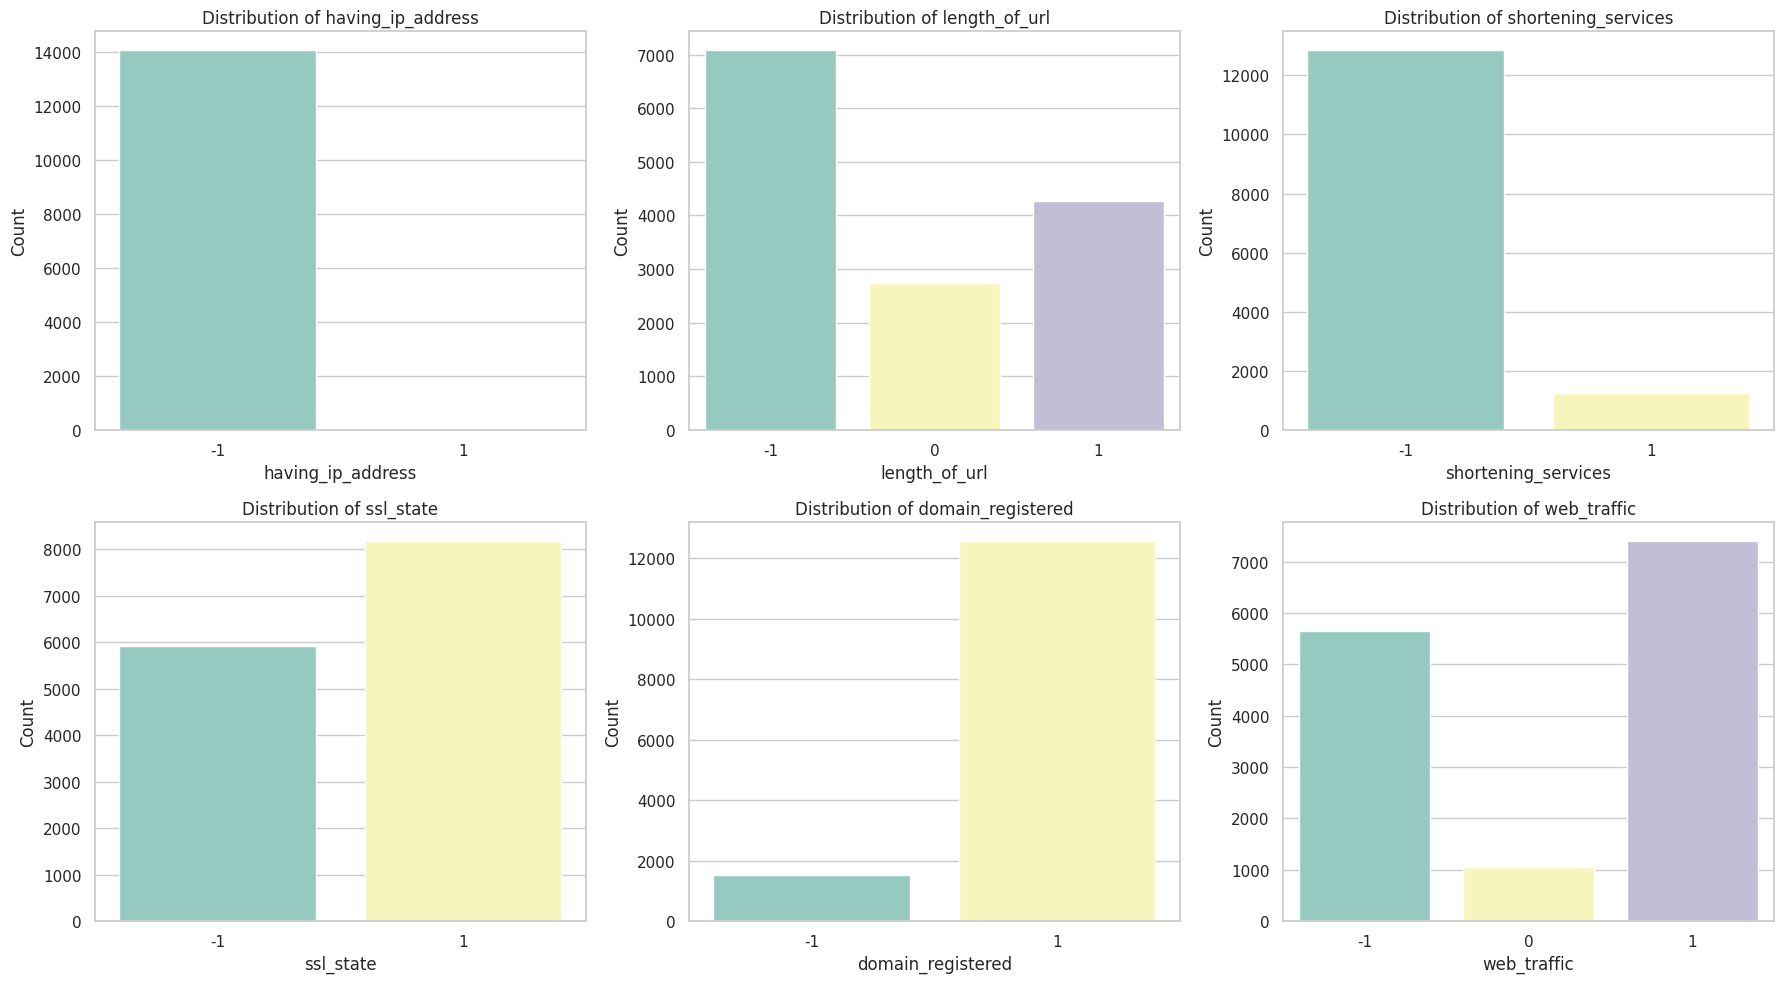

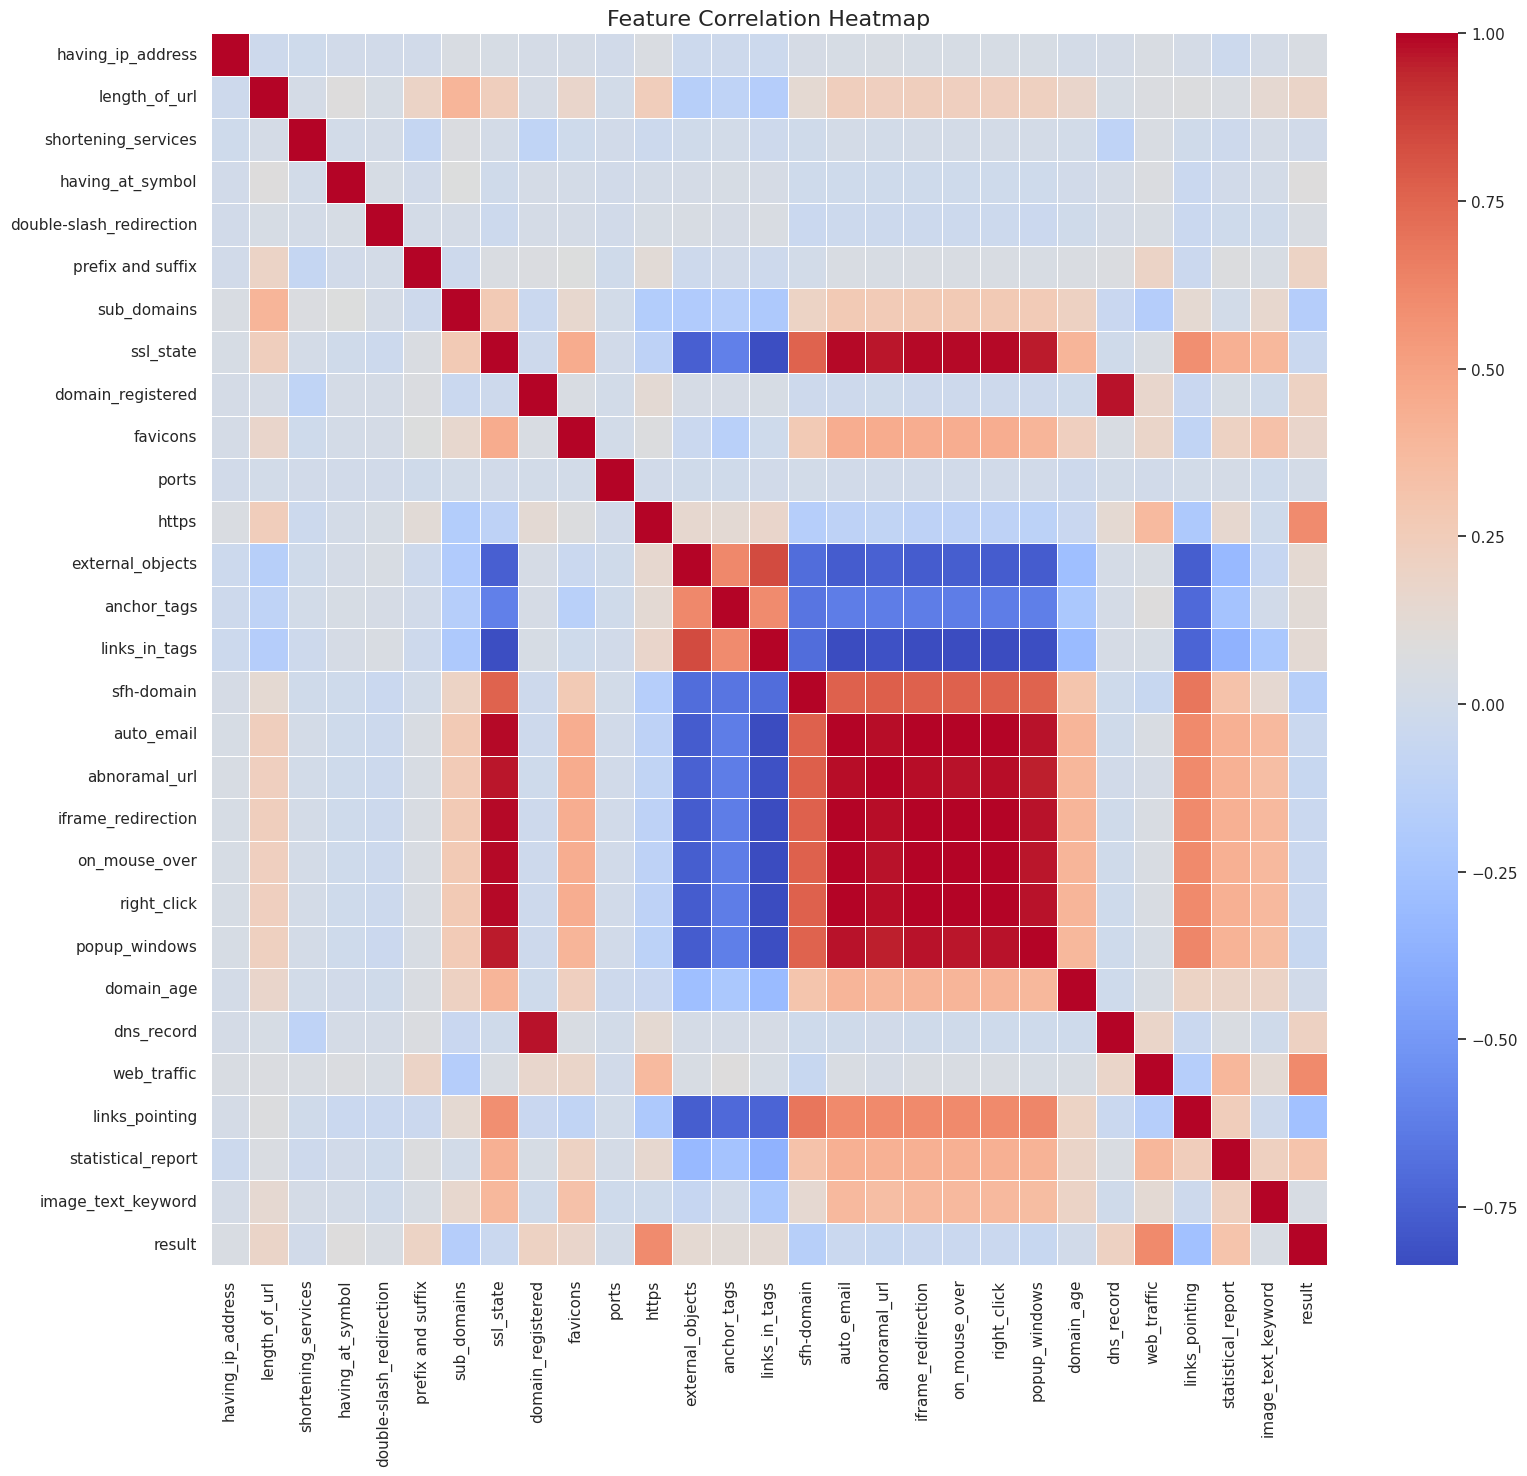

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# -----------------------------------------------------------
# 1. Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='Set2')
plt.title('Distribution of Target Variable (Result)', fontsize=14)
plt.xlabel('Result (1 = Legitimate, -1 = Phishing)')
plt.ylabel('Count')
plt.show()

# -----------------------------------------------------------
# 2. Feature Distributions

# Pick some important features to visualize (otherwise too many plots)
important_features = [
    'having_ip_address', 'length_of_url', 'shortening_services',
    'ssl_state', 'domain_registered', 'web_traffic'
]

plt.figure(figsize=(18,10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=feature, palette='Set3')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# 3. Correlation Heatmap

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18,16))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


Training Logistic Regression...


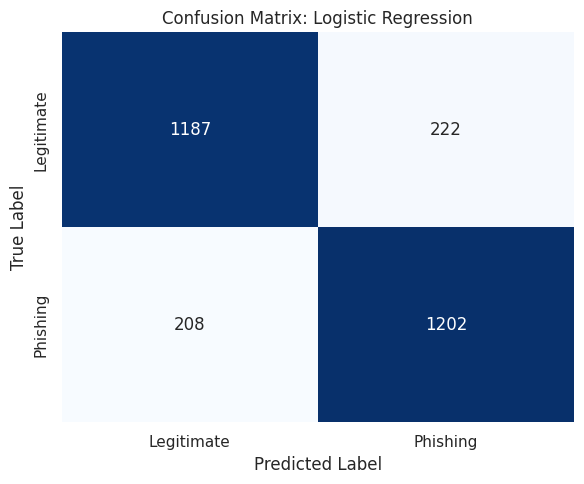

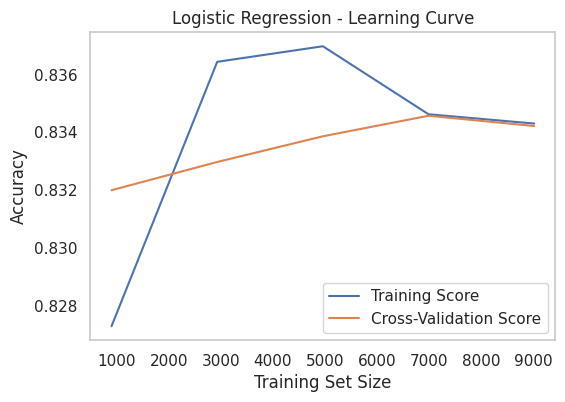

Training Random Forest (Bagging)...


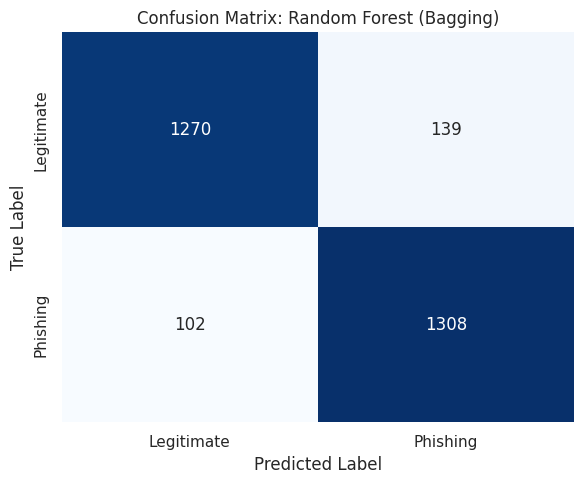

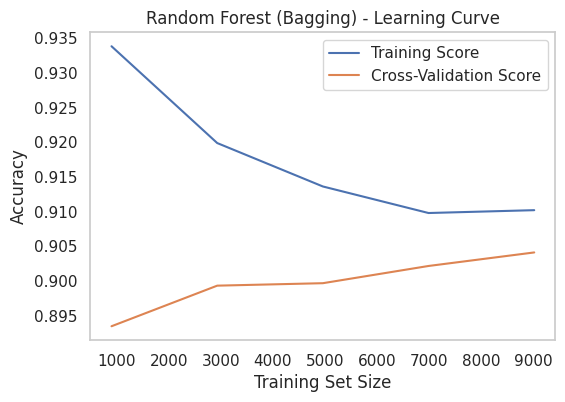

Training AdaBoost (Boosting)...


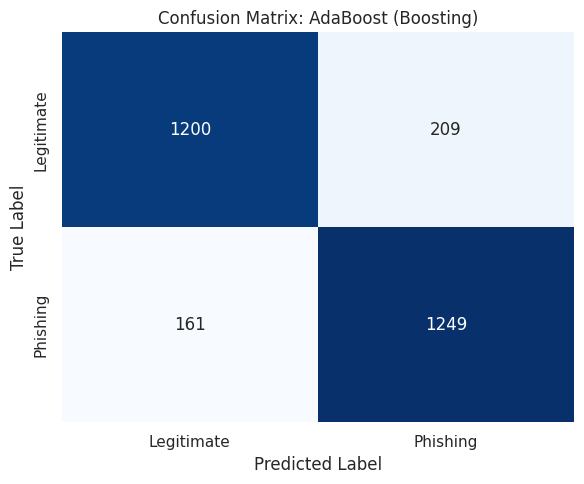

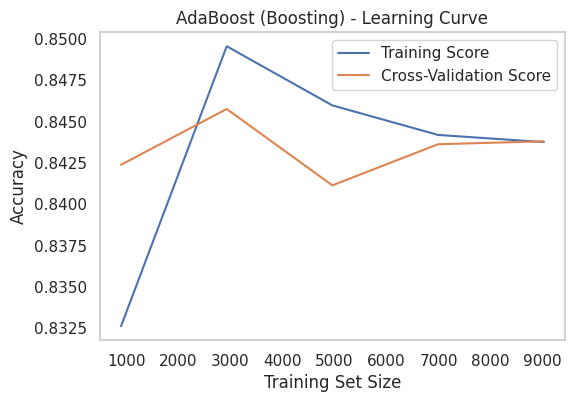

Training Gradient Boosting...


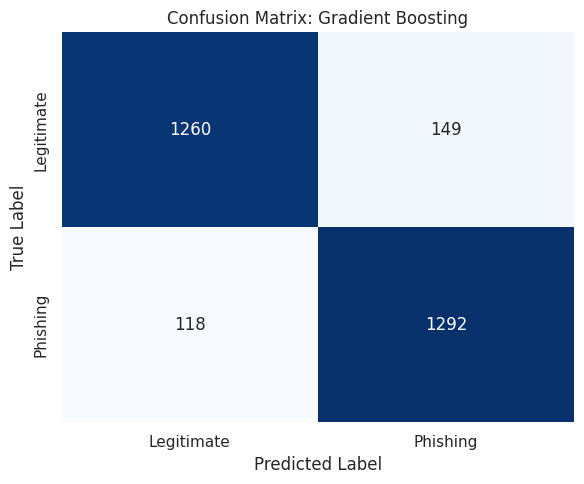

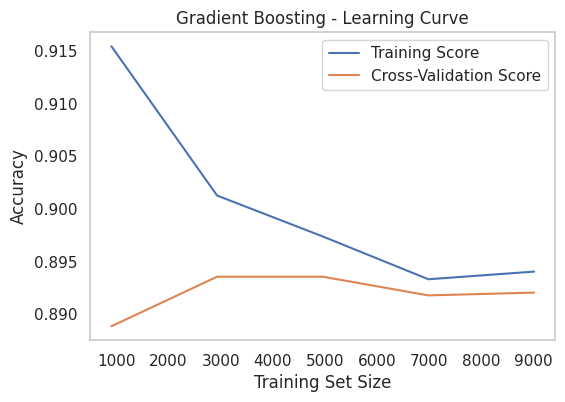

Training SVC...


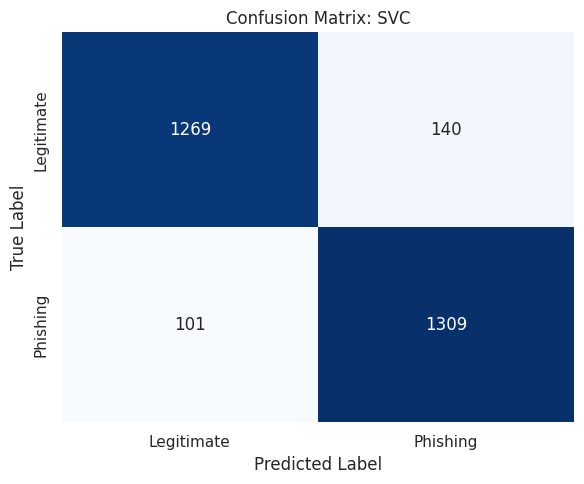

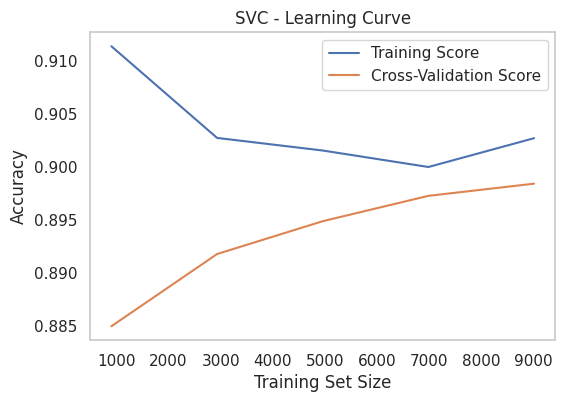

Training Naive Bayes...


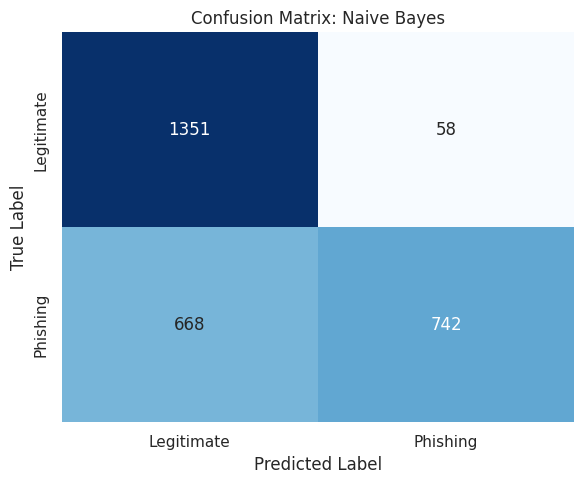

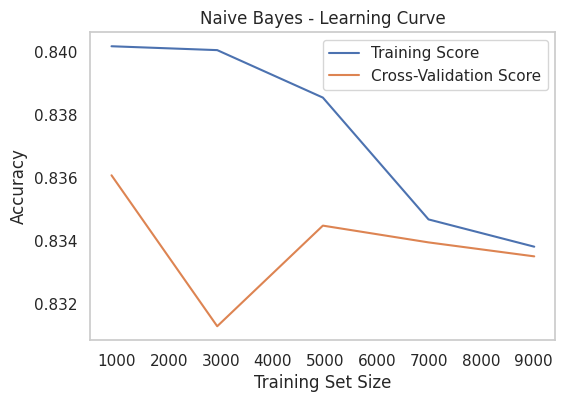

Training Voting Classifier...


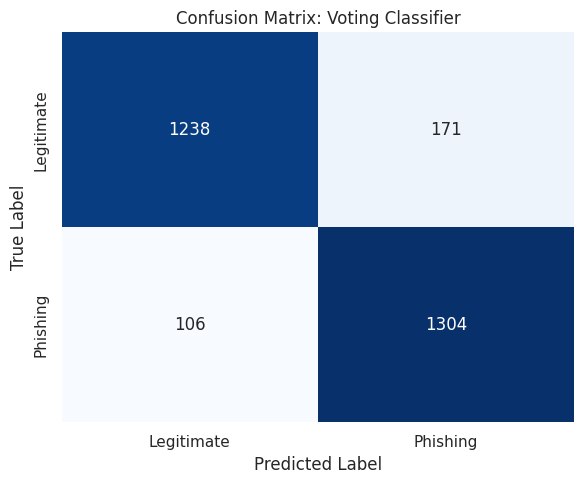

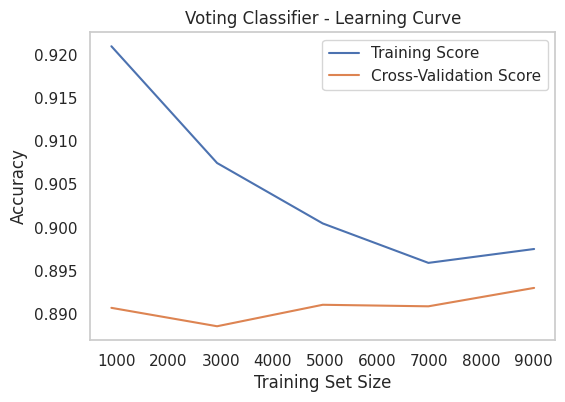

Training Stacking Classifier...


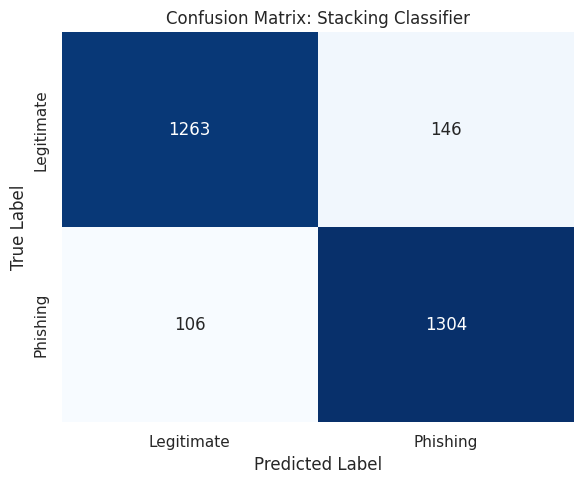

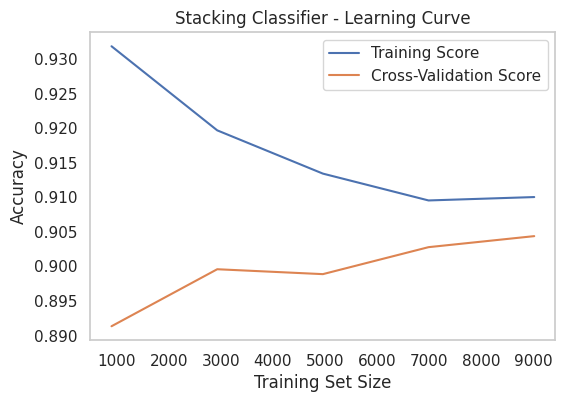

Model: Logistic Regression
Accuracy: 0.8304
Log Loss (Entropy Loss): 0.3373
Classification Report:
              precision    recall  f1-score      support
-1             0.822145  0.843151  0.832516  1409.000000
1              0.839156  0.817730  0.828305  1410.000000
accuracy       0.830436  0.830436  0.830436     0.830436
macro avg      0.830651  0.830441  0.830410  2819.000000
weighted avg   0.830654  0.830436  0.830409  2819.000000
------------------------------------------------------------
Model: Random Forest (Bagging)
Accuracy: 0.8961
Log Loss (Entropy Loss): 0.3699
Classification Report:
              precision    recall  f1-score      support
-1             0.891854  0.901348  0.896576  1409.000000
1              0.900358  0.890780  0.895544  1410.000000
accuracy       0.896062  0.896062  0.896062     0.896062
macro avg      0.896106  0.896064  0.896060  2819.000000
weighted avg   0.896108  0.896062  0.896060  2819.000000
-----------------------------------------------------

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset
df = pd.read_csv('dataset.csv')  # Ensure path is correct

# Add small noise to simulate real-world imperfections
noise_factor = 0.01
noisy_df = df.copy()
feature_cols = noisy_df.columns.difference(['result'])
for col in feature_cols:
    if noisy_df[col].dtype in [np.float64, np.int64]:
        noisy_df[col] += noise_factor * np.random.normal(loc=0.0, scale=1.0, size=noisy_df.shape[0])

# Train/Test Split
X = noisy_df.drop('result', axis=1)
y = noisy_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define base models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest (Bagging)": RandomForestClassifier(n_estimators=100),
    "AdaBoost (Boosting)": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": make_pipeline(StandardScaler(), SVC(probability=True)),
    "Naive Bayes": GaussianNB()
}

# Voting Classifier
voting = VotingClassifier(estimators=[
    ('lr', models["Logistic Regression"]),
    ('rf', models["Random Forest (Bagging)"]),
    ('ab', models["AdaBoost (Boosting)"])
], voting='soft')

# Stacking Classifier
stack = StackingClassifier(estimators=[
    ('lr', models["Logistic Regression"]),
    ('rf', models["Random Forest (Bagging)"])
], final_estimator=LogisticRegression())

# Add ensemble models
models["Voting Classifier"] = voting
models["Stacking Classifier"] = stack

# Train, evaluate, and collect accuracy scores
accuracy_scores = {}

# Store Results
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Check if the model supports 'predict_proba' before calculating log_loss
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_selected)
        loss = log_loss(y_test, y_proba)
    else:
        y_proba = None
        loss = None

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": acc,
        "log_loss": loss,
        "classification_report": report,
        "confusion_matrix": cm
    }






    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Legitimate", "Phishing"],
                yticklabels=["Legitimate", "Phishing"])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    train_sizes, train_scores, test_scores = learning_curve(model, X_train_selected, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score")
    plt.title(f'{name} - Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    if metrics['log_loss'] is not None:
        print(f"Log Loss (Entropy Loss): {metrics['log_loss']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['classification_report']).transpose())
    print("-"*60)


📊 Model Comparison Summary:
                     Model  Accuracy  Log Loss
1  Random Forest (Bagging)  0.896417  0.358511
7      Stacking Classifier  0.895708  0.260096
3        Gradient Boosting  0.893579  0.255069
6        Voting Classifier  0.891806  0.320156
4                      SVC  0.889677  0.301906
2      AdaBoost (Boosting)  0.842852  0.480963
0      Logistic Regression  0.830436  0.337259
5              Naive Bayes  0.826534  0.452098


<ipython-input-8-d0bf4f14853e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=summary_df, palette="viridis")


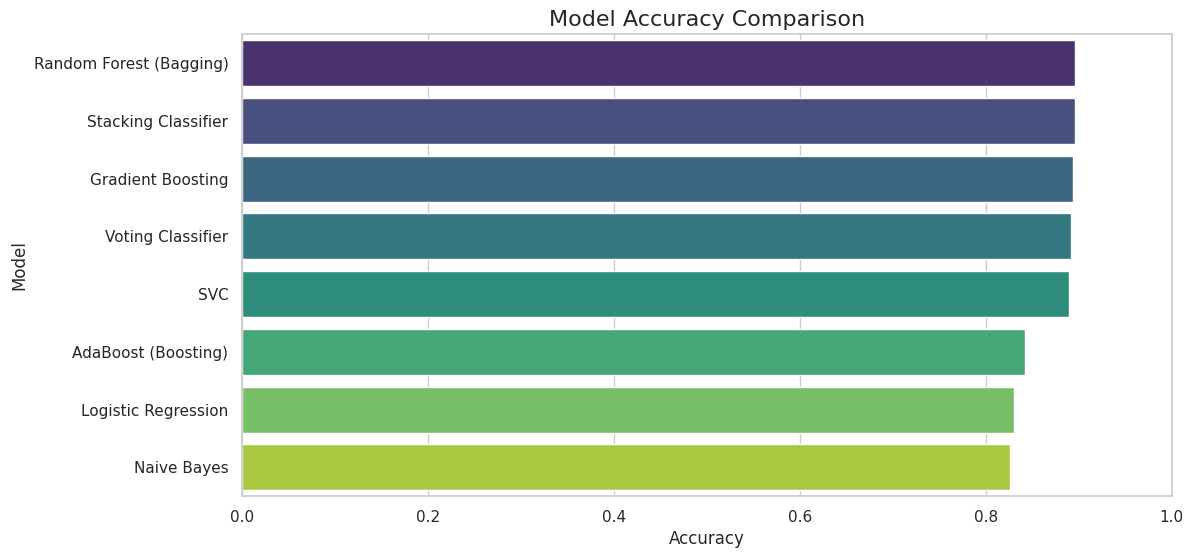

In [ ]:
# Create a summary DataFrame
summary_data = []

for model_name, metrics in results.items():
    summary_data.append({
        "Model": model_name,
        "Accuracy": metrics['accuracy'],
        "Log Loss": metrics['log_loss'] if metrics['log_loss'] is not None else "N/A"
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by="Accuracy", ascending=False)

# Show the summary
print("\n📊 Model Comparison Summary:")
print(summary_df)

# (Optional) Plot it as a bar chart for better visualization
plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=summary_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()
